# Testing built in interactive plotting for SlabExact

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from ipywidgets import interactive, FloatSlider, Layout

%matplotlib widget
plt.style.use('dark_background')

In [2]:
long_wl=1.5e-4

A = SlabExact(scale=1e-5, Ts=[15, 1, 8, 1, 15],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=long_wl)

## Determinant Plot

interactive(children=(FloatSlider(value=7e-07, description='wl', layout=Layout(width='90%'), max=5e-06, min=7e…

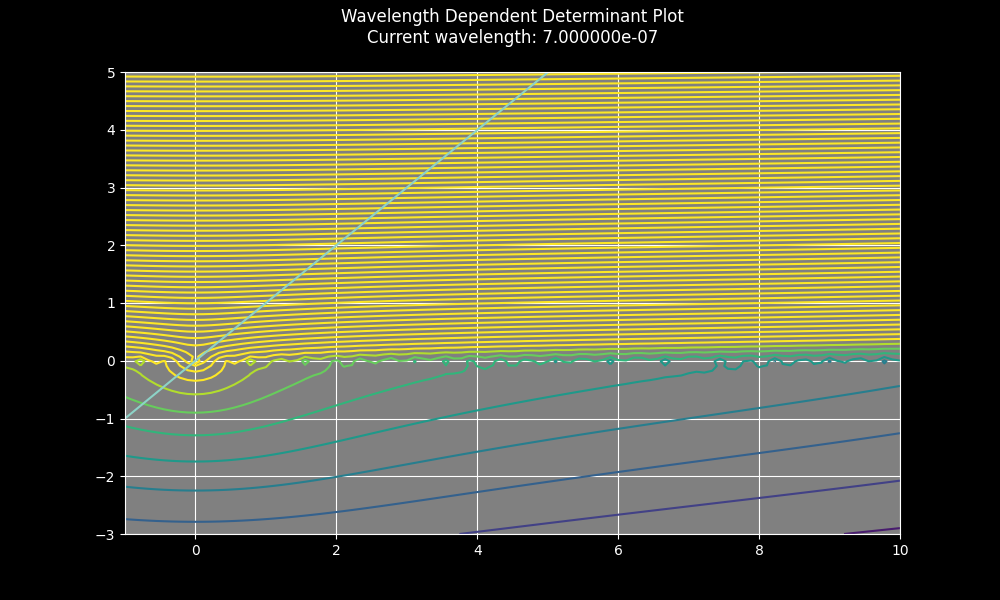

In [3]:
A.interactive_determinant_plot()

In [1]:
# def interactive_determinant_plot():
    # base_wl = self.wl  # get current wl
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10, 6))

rmin, rmax, rref = -1,1,100
imin, imax, iref = -1,1,100
xs, ys = np.linspace(rmin, rmax, rref), np.linspace(imin, imax, iref)

Xs, Ys = np.meshgrid(xs, ys)
Zs = Xs + 1j * Ys

plot_sdp=False
field_type= 'TE'
mode_type='leaky'

minwl=1e-6
maxwl=2e-6
Nwl = 100
levels=50
args={}
def det_plot(wl, plot_sdp=plot_sdp):
    A.wl = wl
    # ax = plt.gca()
    ax.clear()

    fs = A.determinant_Z(Zs, field_type=field_type,
                            mode_type=mode_type)

    data = ax.contour(Xs, Ys, np.log(np.abs(fs)),
                      levels=levels, vmin=-4, vmax=9,
                      **args)
    if plot_sdp:
        sdp_ys = A.SDP_Z(xs)
        msk = np.where((sdp_ys < imax) * (sdp_ys > imin))
        ax.plot(xs[msk], sdp_ys[msk], **args)

    ax.grid(True)
    ax.set_facecolor('grey')
    plt.title('Wavelength: %.6e\n' % (wl), fontsize=14)
    # plt.colorbar(data)
    plt.show()

step = (maxwl - minwl) / Nwl

interactive_plot = interactive(det_plot,
                               wl=FloatSlider(min=minwl, max=maxwl,
                                              step=step, value=minwl,
                                              readout_format='.5e',
                                              layout=Layout(
                                                  width='50%')))
output = interactive_plot.children[-1]
output.layout.width = '1000px'
interactive_plot

NameError: name 'plt' is not defined

## Spectral Integral plot

In [3]:
b = 1.25
a = 1/ b**2
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - a * x**2, 0]
    return np.piecewise(x, conds, funcs)

f0 = quadratic_piecewise

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=20.0, min=-20.0,…

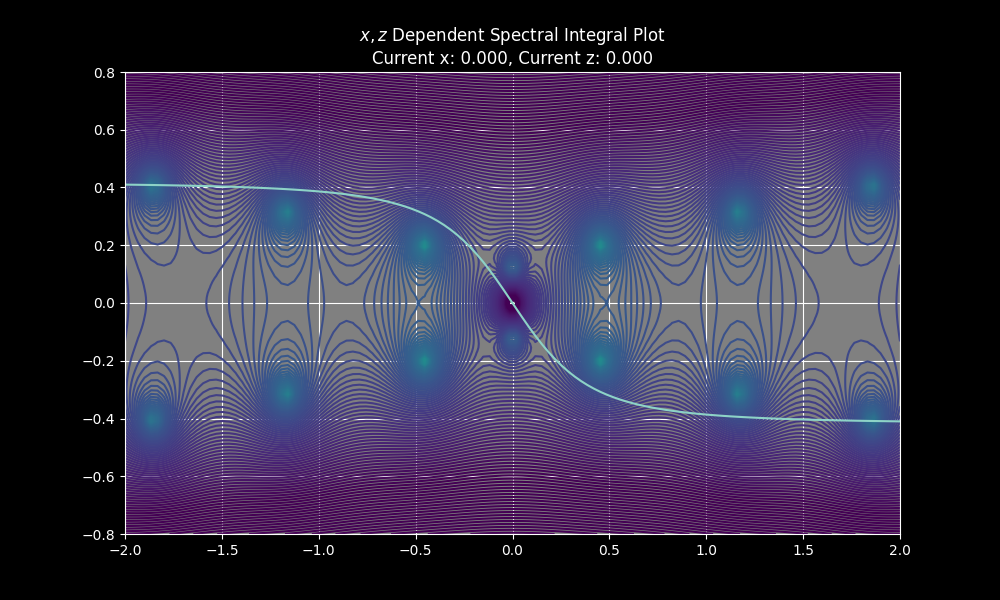

In [8]:
A.interactive_spectral_integrand_plot(f0, Lx=-b, Rx=b, imax=.8, imin=-.8, class_A_only=True, paper_method=False)

In [50]:
f0=quadratic_piecewise
min_x=None
max_x=None
Nx=100
min_z=0
max_z=10
Nz=100
rmin=-2
rmax=2
imin=-1
imax=1
rref=100
iref=100
levels=70
field_type='TE'
paper_method=False
class_A_only=False
class_B_only=False
plot_sdp=True
sdp_sign=-1
grid=True
facecolor='grey'
figsize=(10, 6)
width='1250px'
self = A
Lx=-b
Rx=b

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=20.0, min=-20.0,…

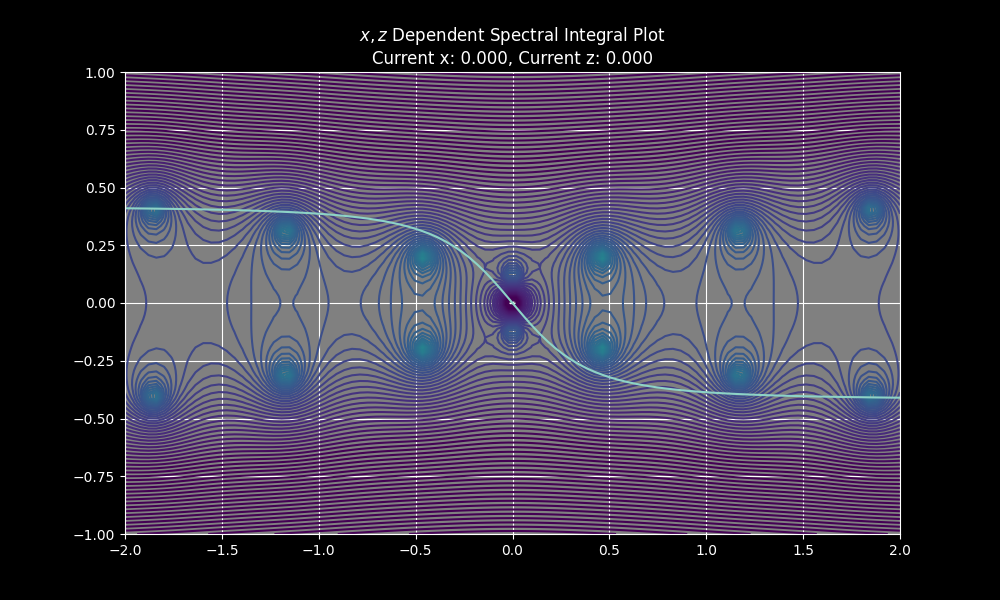

In [51]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=figsize)

res, ims = np.linspace(rmin, rmax, rref), np.linspace(imin, imax, iref)

Res, Ims = np.meshgrid(res, ims)
Zs = Res + 1j * Ims

if class_A_only and class_A_only:
    raise ValueError('At most one of class_A_only and class_B_only can \
be set to True.')

if class_A_only and not class_B_only:
    alpha_A = self.radiation_transform(Zs, f0=f0, sign='+1',
                                       Lx=Lx, Rx=Rx,
                                       field_type=field_type,
                                       paper_method=paper_method)
    alpha_B = None
elif class_B_only and not class_A_only:
    alpha_B = self.radiation_transform(Zs, f0=f0, sign='-1',
                                       Lx=Lx, Rx=Rx,
                                       field_type=field_type,
                                       paper_method=paper_method)
    alpha_A = None
else:
    alpha_A = self.radiation_transform(Zs, f0=f0, sign='+1',
                                       Lx=Lx, Rx=Rx,
                                       field_type=field_type,
                                       paper_method=paper_method)
    alpha_B = self.radiation_transform(Zs, f0=f0, sign='-1',
                                       Lx=Lx, Rx=Rx,
                                       field_type=field_type,
                                       paper_method=paper_method)

def int_plot(x, z, plot_sdp=plot_sdp):
    ax.clear()
    fs = self.spectral_integrand(Zs, f0, x=x, z=z,
                                 alpha_A=alpha_A,
                                 alpha_B=alpha_B,
                                 class_A_only=class_A_only,
                                 class_B_only=class_B_only,
                                 field_type=field_type,
                                 paper_method=paper_method,
                                 )
    Vals = np.log(np.abs(fs))
    ax.contour(Res, Ims, Vals, levels=levels, vmin=-4, vmax=9)
    if plot_sdp:
        sdp_ys = self.sdp_Z(res, sdp_sign=sdp_sign)
        msk = np.where((sdp_ys < imax) * (sdp_ys > imin))
        ax.plot(res[msk], sdp_ys[msk])

    ax.grid(grid)
    ax.set_facecolor(facecolor)
    plt.title('$x,z$ Dependent Spectral Integral Plot\n\
Current x: %.3f, Current z: %.3f' % (x, z), fontsize=12)

if min_x is None:
    min_x = self.Rhos[0]
if max_x is None:
    max_x = self.Rhos[-1]

step_x = (max_x - min_x) / Nx
step_z = (max_z - min_z) / Nz

x_slider = FloatSlider(min=min_x, max=max_x, step=step_x, value=0,
                       readout_format='.3f', layout=Layout(width='90%'))

z_slider = FloatSlider(min=min_z, max=max_z, step=step_z, value=0,
                       readout_format='.3f', layout=Layout(width='90%'))

interactive_plot = interactive(int_plot, x=x_slider, z=z_slider)
output = interactive_plot.children[-1]
output.layout.width = '1250px'
interactive_plot